In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [78]:
# ,lineterminator='\n'
data = pd.read_csv('ProShop_Zalando_test.csv')
data.head(10)

,rating,review
0,__label__5,super service har handlet flere gange har al...
1,__label__1,kan kun give em stjerne for dette købsforløb. ...
2,__label__5,fem stjerner for at lytte til en klage. jeg re...
3,__label__4,de ting der blev leveret var ok leveringsti...
4,__label__5,proshop havde bedste pris på det ønskede produ...
5,__label__5,god pris!! hurtig og præcis levering. varen ok.
6,__label__5,godt udvalg gode priser og varerne kom dagen ...
7,__label__5,hurtig og effektiv leverig. varer som bestilt.
8,__label__5,fedt med så hurtig en levering
9,__label__5,proshop skuffer aldrig!bestilte en vare fredag...


In [79]:
import fasttext

model = fasttext.train_supervised('ProShop_Zalando_test.csv')
data['vec'] = data['review'].apply(lambda x: model.get_sentence_vector(str(x)))

In [80]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9986087679862976, ',dårlig'),
 (0.9985242486000061, 'ingen'),
 (0.9981115460395813, 'for'),
 (0.9976317882537842, 'annulleret'),
 (0.9973751902580261, ',elendig'),
 (0.9969439506530762, 'bliver'),
 (0.9968459606170654, 'ikke'),
 (0.995770275592804, '1'),
 (0.9952507615089417, 'skriver'),
 (0.9952459931373596, 'siden')]

In [81]:
model.get_nearest_neighbors('utilfreds')

[(0.938835859298706, 'vide'),
 (0.9356640577316284, 'modtaget'),
 (0.9350650906562805, 'nu'),
 (0.9345362782478333, ',dårlig'),
 (0.9341402053833008, '1'),
 (0.9339816570281982, ',elendig'),
 (0.9338326454162598, 'ikke'),
 (0.9336597323417664, 'fået'),
 (0.9331564903259277, 'skriver'),
 (0.9330911636352539, 'dårlig')]

In [82]:
model.get_nearest_neighbors('glad')

[(0.9931862354278564, 'godt'),
 (0.9927673935890198, ',hurtig'),
 (0.9887728691101074, 'eneste'),
 (0.9881294369697571, 'udvalg'),
 (0.9865726828575134, ',god'),
 (0.9844964146614075, 'pakker'),
 (0.977603018283844, 'forhold'),
 (0.9772179126739502, 'retur.'),
 (0.976115882396698, ',levering'),
 (0.9730858206748962, 'kom')]

In [83]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [84]:
print(data['cluster'].value_counts())

0    2894
3    1681
1    1484
4     825
2     343
Name: cluster, dtype: int64


In [85]:
print(model.labels)

['__label__5', '__label__1', '__label__4', '__label__2', '__label__3']


In [87]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)
-np.sort(-clusterCount)

[2894 1484  343 1681  825]


array([2894, 1681, 1484,  825,  343])

In [88]:
data['rating'].value_counts(ascending=False)

__label__5     3923
__label__1     2291
__label__4      432
__label__2      363
__label__3      218
Name: rating, dtype: int64

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [77]:
#print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

0    2894
3    1681
1    1484
4     825
2     343
Name: cluster, dtype: int64


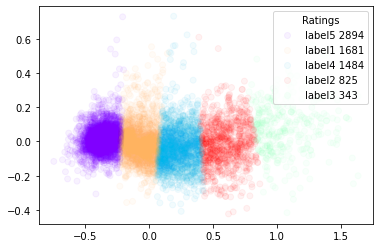

In [92]:
scatter = plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow', alpha=0.05)

# dc = data_cluster
# cc = cluster_colors
# cl = cluster_labels
print(data['cluster'].value_counts())
dc = data['cluster'].value_counts()
dc = -np.sort(-dc)
cc = data['cluster'].value_counts().index.tolist()

cl = []
for i in model.labels:
    cl.append(i.replace('__',''))

handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot

plt.legend(title='Ratings', handles=handles,  
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])

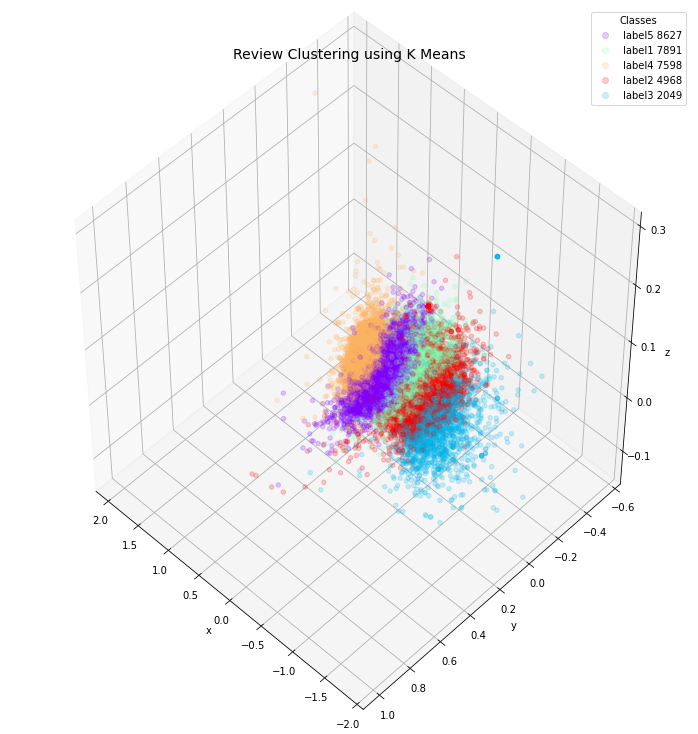

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow', alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)
plt.legend(title='Classes', handles=handles, 
           labels=[cl[0]+' '+str(dc[0]),
                   cl[1]+' '+str(dc[1]),
                   cl[2]+' '+str(dc[2]),
                   cl[3]+' '+str(dc[3]),
                   cl[4]+' '+str(dc[4])])
